# Exploratory Data Analysis
In this notebook, we will look at data on the movies we have available to include in our modeling. Not all of this information will be used in modeling, but it will let us see trends and features of our data that may influence how our recommender system is set up or interpretted.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing Review Data

### Reading in our Review Data

In [2]:
reviews = pd.read_csv('../Data/Large-Data/merged_reviews.csv')

/var/folders/jc/vvd13n2d3m33dzsrsg9ydhb00000gn/T/ipykernel_2293/875535838.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('../Data/Large-Data/merged_reviews.csv')


In [8]:
reviews.head()

,user_id,imdb_id,scaled_rating,title
0,1,tt0110912,10.0,Pulp Fiction
1,1,tt0111495,7.0,Trois couleurs: Rouge
2,1,tt0108394,10.0,Trois couleurs: Bleu
3,1,tt0114787,10.0,Underground
4,1,tt0045152,7.0,Singin' in the Rain


In [13]:
reviews.dtypes

user_id           object
imdb_id           object
scaled_rating    float64
title             object
dtype: object

### Distribution of Reviews

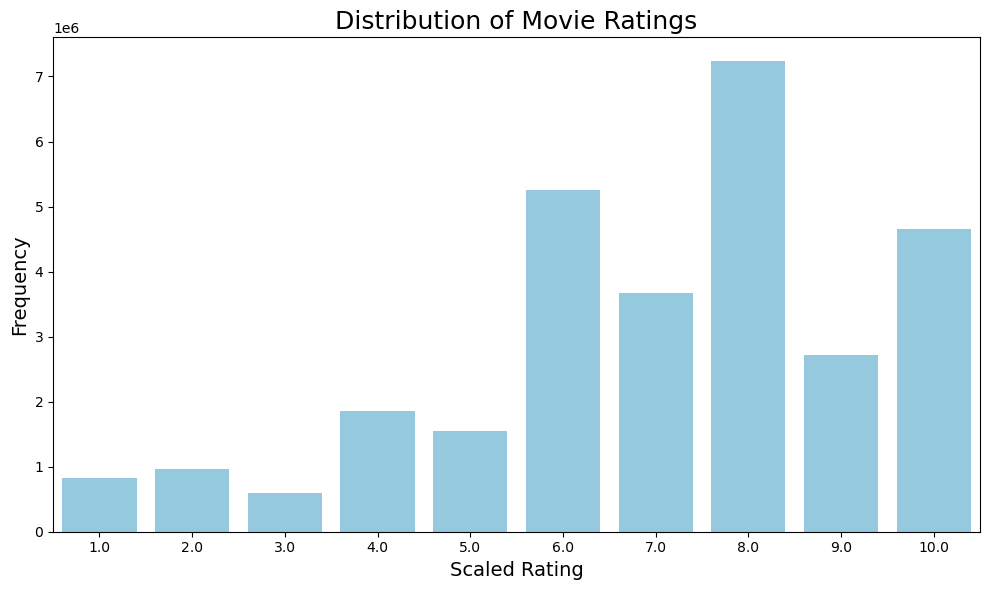

In [37]:
plt.figure(figsize=(10, 6))

sns.countplot(data=reviews, x='scaled_rating', color='skyblue')

plt.title('Distribution of Movie Ratings', fontsize = 18)
plt.xlabel('Scaled Rating', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)

plt.tight_layout()
plt.savefig('../Visualizations/distribution_of_movie_ratings.png')
plt.show()

**Interpretation:** Ratings look like they are typically positive. There are significantly more reviews with a rating 6 or more than there are with a rating of 5 or less. It is interesting that there are also more even-numbered ratings compared to their odd-numbered neighbors. This may be because our MovieLens reviews were originally on a scale of 1-5 in intervals of .5. When they were scaled to match the IMDb reviews, we simply doubled the rating, so 2 became 4, 2.5 became 5, and so on. Could this trend be because MovieLens reviewers tended to favor a rating a movie a whole number?

### Distribution of Reviews by Source

In [3]:
reviews['source'] = reviews['user_id'].astype(str).apply(lambda x: 'MovieLens' if x.isdigit() else 'IMDb')

In [20]:
reviews

,user_id,imdb_id,scaled_rating,title,source
0,1,tt0110912,10.0,Pulp Fiction,MovieLens
1,1,tt0111495,7.0,Trois couleurs: Rouge,MovieLens
2,1,tt0108394,10.0,Trois couleurs: Bleu,MovieLens
3,1,tt0114787,10.0,Underground,MovieLens
4,1,tt0045152,7.0,Singin' in the Rain,MovieLens
...,...,...,...,...,...
29326187,ur0581842,tt0107977,6.0,Robin Hood: Men in Tights,IMDb
29326188,ur3174947,tt0103776,8.0,Batman Returns,IMDb
29326189,ur4592639,tt0107423,9.0,Lipstick on Your Collar,IMDb
29326190,ur4581944,tt0102614,8.0,Out for Justice,IMDb


In [4]:
avg_ratings = reviews.groupby('source')['scaled_rating'].mean()
avg_ratings


source
IMDb         6.740738
MovieLens    7.067661
Name: scaled_rating, dtype: float64

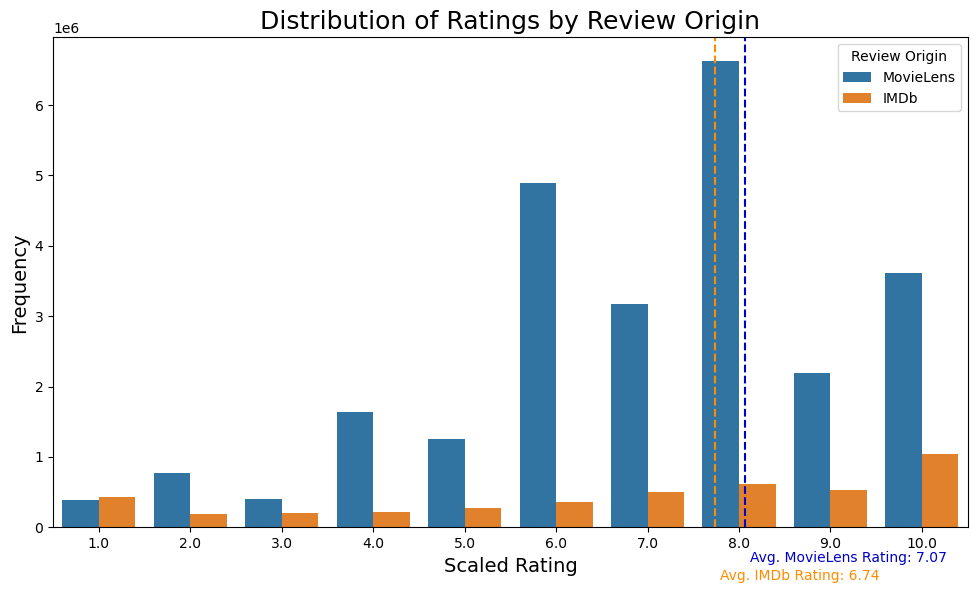

In [38]:
plt.figure(figsize=(10, 6))

sns.countplot(data=reviews, x='scaled_rating', hue='source')

plt.title('Distribution of Ratings by Review Origin', fontsize= 18)
plt.xlabel('Scaled Rating', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)
plt.legend(title='Review Origin')

plt.axvline(x=round(avg_ratings['IMDb'], 2), linestyle='--', color='darkorange', label=f"Avg. IMDb Rating: {round(avg_ratings['IMDb'], 2)}")
plt.text(avg_ratings['IMDb'] + 0.05, -750000, f"Avg. IMDb Rating: {round(avg_ratings['IMDb'], 2)}", color='darkorange')

plt.axvline(x=round(avg_ratings['MovieLens'], 2), linestyle='--', color='mediumblue', label=f"Avg. MovieLens Rating: {round(avg_ratings['MovieLens'], 2)}")
plt.text(avg_ratings['MovieLens'] + .05, -500000, f"Avg. MovieLens Rating: {round(avg_ratings['MovieLens'], 2)}", color='mediumblue')

plt.tight_layout()
plt.savefig('../Visualizations/distribution_of_ratings_by_origin.png')
plt.show()

**Interpretation:** It looks like our hypothesis was correct, as the trend of even and odd reviews only appears in the MovieLens reviews. This could be from the data collection. If some users were only given the option to give whole number ratings it would skew the results. It looks like MovieLens users are also rate movies more favorably, with an average rating of 7.06 compared to IMDb's 6.74.

### Top Rated Movies

In [5]:
ml_reviews = pd.read_csv('../Data/Large-Data/ml_reviews.csv')
ml_reviews

,user_id,imdb_id,scaled_rating,title
0,1,tt0110912,10.0,Pulp Fiction
1,1,tt0111495,7.0,Trois couleurs: Rouge
2,1,tt0108394,10.0,Trois couleurs: Bleu
3,1,tt0114787,10.0,Underground
4,1,tt0045152,7.0,Singin' in the Rain
...,...,...,...,...
24969860,162541,tt0382932,9.0,Ratatouille
24969861,162541,tt0389790,5.0,Bee Movie
24969862,162541,tt0952640,4.0,Alvin and the Chipmunks
24969863,162541,tt0468569,8.0,The Dark Knight


In [6]:
# Calculate the count of reviews for each movie
reviews_per_movie = ml_reviews.groupby('imdb_id').size()
reviews_per_movie

imdb_id
tt0000001    12
tt0000003    13
tt0000007     5
tt0000008    22
tt0000010    42
             ..
tt9866700     1
tt9872556     3
tt9876160     3
tt9900060     1
tt9900782     2
Length: 58314, dtype: int64

In [7]:
# Filter out movies with less than 100 reviews
movies_over_100_reviews = reviews_per_movie[reviews_per_movie >= 100].index
movies_over_100_reviews

Index(['tt0000417', 'tt0000439', 'tt0004972', 'tt0006864', 'tt0008133',
       'tt0009018', 'tt0009968', 'tt0010040', 'tt0010323', 'tt0012349',
       ...
       'tt8359848', 'tt8361028', 'tt8465676', 'tt8632862', 'tt8695030',
       'tt8760684', 'tt8772262', 'tt9243946', 'tt9412098', 'tt9495224'],
      dtype='object', name='imdb_id', length=10299)

In [8]:
# Filter the DataFrame to include only reviews for valid movies
reviews_filtered = ml_reviews[ml_reviews['imdb_id'].isin(movies_over_100_reviews)]
reviews_filtered

,user_id,imdb_id,scaled_rating,title
0,1,tt0110912,10.0,Pulp Fiction
1,1,tt0111495,7.0,Trois couleurs: Rouge
2,1,tt0108394,10.0,Trois couleurs: Bleu
3,1,tt0114787,10.0,Underground
4,1,tt0045152,7.0,Singin' in the Rain
...,...,...,...,...
24969860,162541,tt0382932,9.0,Ratatouille
24969861,162541,tt0389790,5.0,Bee Movie
24969862,162541,tt0952640,4.0,Alvin and the Chipmunks
24969863,162541,tt0468569,8.0,The Dark Knight


In [9]:
# Calculate the average rating for each movie
average_ratings_per_movie = reviews_filtered.groupby(['imdb_id'])['scaled_rating'].mean().reset_index()
average_ratings_per_movie

,imdb_id,scaled_rating
0,tt0000417,7.493776
1,tt0000439,6.642857
2,tt0004972,6.211905
3,tt0006864,7.241525
4,tt0008133,7.312500
...,...,...
10294,tt8760684,7.948052
10295,tt8772262,7.469734
10296,tt9243946,7.285714
10297,tt9412098,7.111821


In [10]:
average_ratings_with_titles = pd.merge(average_ratings_per_movie, reviews_filtered[['imdb_id', 'title']].drop_duplicates(), on='imdb_id', how='left')
average_ratings_with_titles

,imdb_id,scaled_rating,title
0,tt0000417,7.493776,Le voyage dans la lune
1,tt0000439,6.642857,The Great Train Robbery
2,tt0004972,6.211905,The Birth of a Nation
3,tt0006864,7.241525,Intolerance: Love's Struggle Throughout the Ages
4,tt0008133,7.312500,The Immigrant
...,...,...,...
10294,tt8760684,7.948052,Apollo 11
10295,tt8772262,7.469734,Midsommar
10296,tt9243946,7.285714,El Camino: A Breaking Bad Movie
10297,tt9412098,7.111821,Fyre


In [11]:
# Sort the movies based on their overall average ratings
top_10_movies = average_ratings_with_titles.sort_values(by = 'scaled_rating', ascending=False).head(10)
top_10_movies

,imdb_id,scaled_rating,title
10155,tt5491994,8.966192,Planet Earth II
7703,tt0795176,8.929594,Planet Earth
3869,tt0111161,8.827152,The Shawshank Redemption
5410,tt0185906,8.797198,Band of Brothers
1852,tt0081846,8.653430,Cosmos
1311,tt0068646,8.648672,The Godfather
10248,tt6769208,8.579666,Blue Planet II
4173,tt0114814,8.568706,The Usual Suspects
1421,tt0071562,8.523517,The Godfather Part II
9914,tt3718778,8.516484,Over the Garden Wall


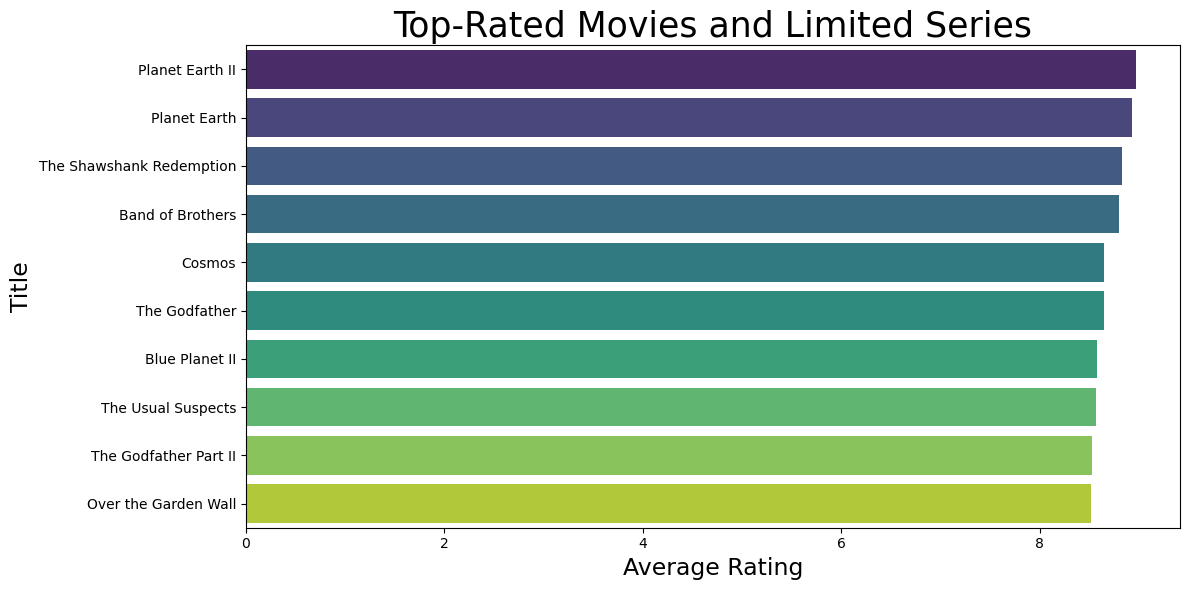

In [25]:
# Plotting the top-rated movies
plt.figure(figsize=(12, 6))

sns.barplot(x=top_10_movies['scaled_rating'], y = top_10_movies['title'], palette='viridis')

plt.title('Top-Rated Movies and Limited Series', fontsize = 25)
plt.xlabel('Average Rating', fontsize = 17)
plt.ylabel('Title', fontsize = 17)

plt.tight_layout()
plt.savefig('../Visualizations/top_rated.png')
plt.show()

### Lowest Rated Movies

In [19]:
# Sort the movies based on their overall average ratings
bottom_10_movies = average_ratings_with_titles.sort_values(by = 'scaled_rating', ascending=True).head(9)
bottom_10_movies

,imdb_id,scaled_rating,title
5964,tt0270846,1.798077,Superbabies: Baby Geniuses 2
6499,tt0339034,2.055156,From Justin to Kelly
4494,tt0118589,2.251121,Glitter
4818,tt0120598,2.390428,Barney's Great Adventure
8408,tt1213644,2.411131,Disaster Movie
6192,tt0299930,2.428760,Gigli
6621,tt0362165,2.464455,Son of the Mask
4233,tt0115834,2.548148,Carnosaur 3: Primal Species
5644,tt0223250,2.549383,Faces of Death VI


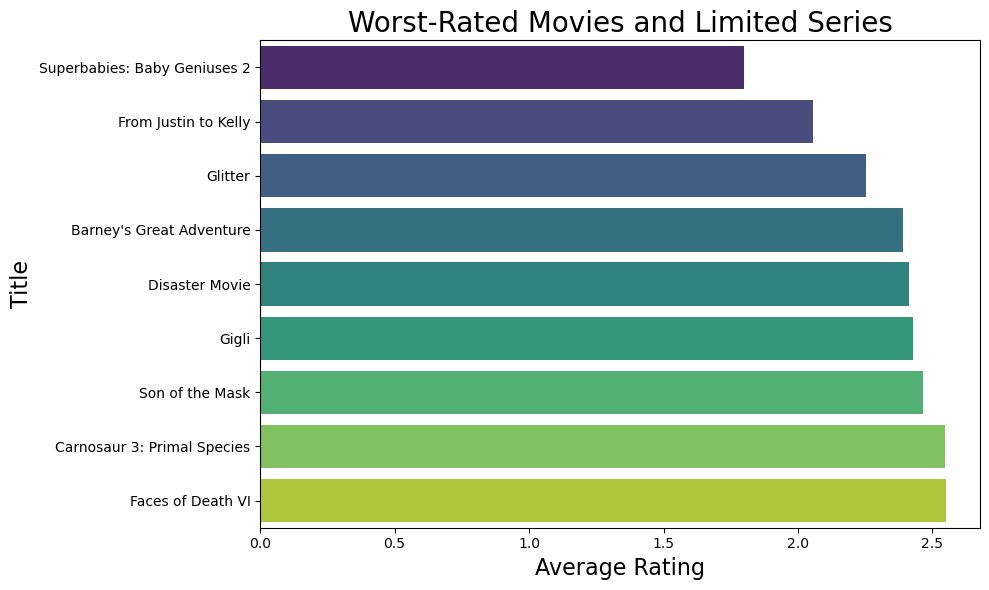

In [23]:
# Plotting the worst-rated movies
plt.figure(figsize=(10, 6))

sns.barplot(x=bottom_10_movies['scaled_rating'], y = bottom_10_movies['title'], palette='viridis')

plt.title('Worst-Rated Movies and Limited Series', fontsize = 20)
plt.xlabel('Average Rating', fontsize = 16)
plt.ylabel('Title', fontsize = 16)

plt.tight_layout()
plt.savefig('../Visualizations/worst_rated.png')
plt.show()

### Distribution of the Number of Reviews per Movie

In [26]:
reviews_per_movie = reviews_filtered.groupby('imdb_id').size()
reviews_per_movie

imdb_id
tt0000417    723
tt0000439    140
tt0004972    420
tt0006864    236
tt0008133    160
            ... 
tt8760684    231
tt8772262    413
tt9243946    252
tt9412098    313
tt9495224    814
Length: 10299, dtype: int64

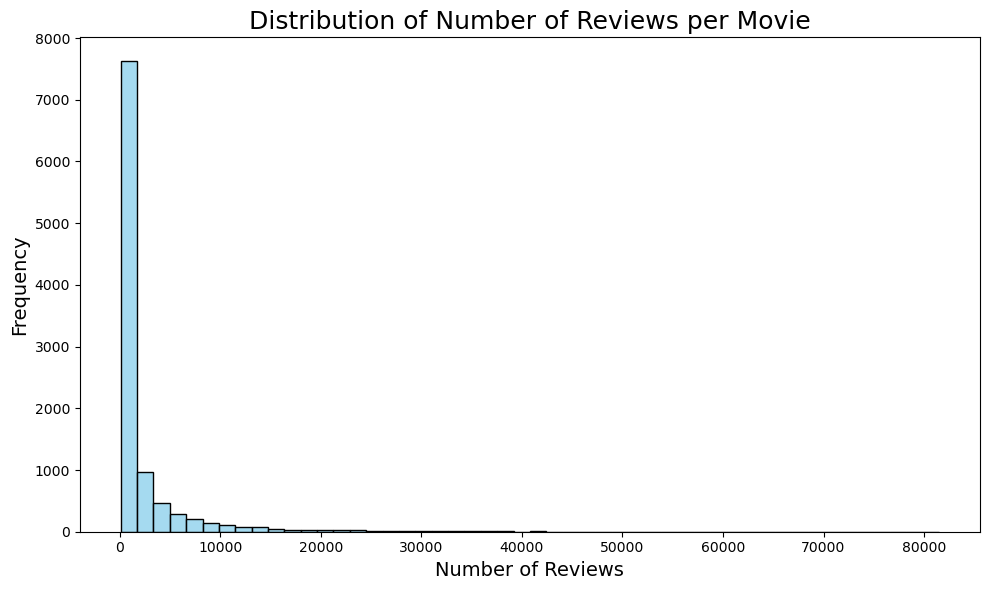

In [28]:
# Plotting the distribution of the number of reviews per movie
plt.figure(figsize=(10, 6))

sns.histplot(reviews_per_movie, bins=50, color='skyblue')

plt.title('Distribution of Number of Reviews per Movie', fontsize= 18)
plt.xlabel('Number of Reviews', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)

plt.tight_layout()
plt.savefig('../Visualizations/reviews_per_movie.png')
plt.show()

**Interpretation:** Over 7,500 of our 10,000 movies have under 1,600 reviews. This is also after filtering out movies with less than 100 reviews. We should also look at the distribution with an even higher threshhold for the number of reviews. For our movie recommender system to work we want to have a good amount of data on each movie included to cut down on the effect of outliers.

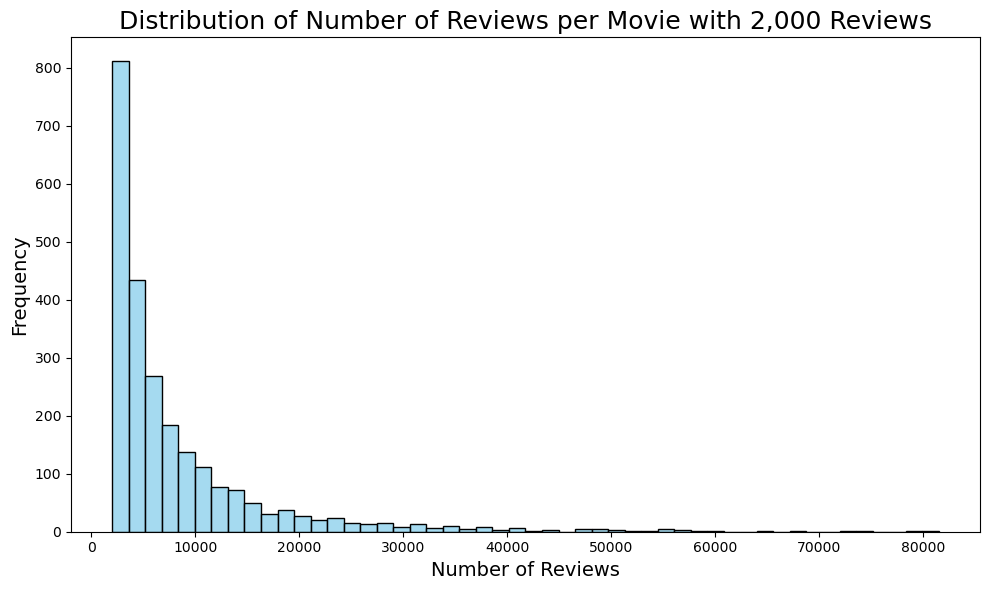

In [29]:
# Plotting the distribution of the number of reviews per movie with a minimum of 2000 reviews
plt.figure(figsize=(10, 6))

sns.histplot(reviews_per_movie[reviews_per_movie >= 2000], bins=50, color='skyblue')

plt.title('Distribution of Number of Reviews per Movie with 2,000 Reviews', fontsize= 18)
plt.xlabel('Number of Reviews', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)

plt.tight_layout()
plt.savefig('../Visualizations/reviews_per_movie_min_2k.png')
plt.show()

**Interepretation:** This is still heavily right-skewed. It is clear that the number of reviews per movie is in no way normally distributed. A few very popuplar (or just well known) movies have the most reviews, while most do not make it past a few thousand. Are these movies with a large number of reviews well received?

### Is a lot of ratings good?

In [30]:
# Filter out movies with less than 10000 reviews
movies_over_10_000_reviews = reviews_per_movie[reviews_per_movie >= 10000].index
movies_over_10_000_reviews

Index(['tt0029583', 'tt0031381', 'tt0032138', 'tt0032455', 'tt0032910',
       'tt0033467', 'tt0033870', 'tt0034583', 'tt0038650', 'tt0043265',
       ...
       'tt2015381', 'tt2084970', 'tt2096673', 'tt2245084', 'tt2267998',
       'tt2278388', 'tt2488496', 'tt2543164', 'tt2582802', 'tt3659388'],
      dtype='object', name='imdb_id', length=588)

In [31]:
# Filter the DataFrame to include only reviews for valid movies
reviews_over_10_000 = ml_reviews[ml_reviews['imdb_id'].isin(movies_over_10_000_reviews)]
reviews_over_10_000

,user_id,imdb_id,scaled_rating,title
0,1,tt0110912,10.0,Pulp Fiction
4,1,tt0045152,7.0,Singin' in the Rain
5,1,tt0092890,8.0,Dirty Dancing
9,1,tt0050212,8.0,The Bridge on the River Kwai
11,1,tt0119177,8.0,GATTACA
...,...,...,...,...
24969856,162541,tt0347149,9.0,Hauru no ugoku shiro
24969857,162541,tt0372784,8.0,Batman Begins
24969858,162541,tt0363771,8.0,"The Chronicles of Narnia: The Lion, the Witch ..."
24969860,162541,tt0382932,9.0,Ratatouille


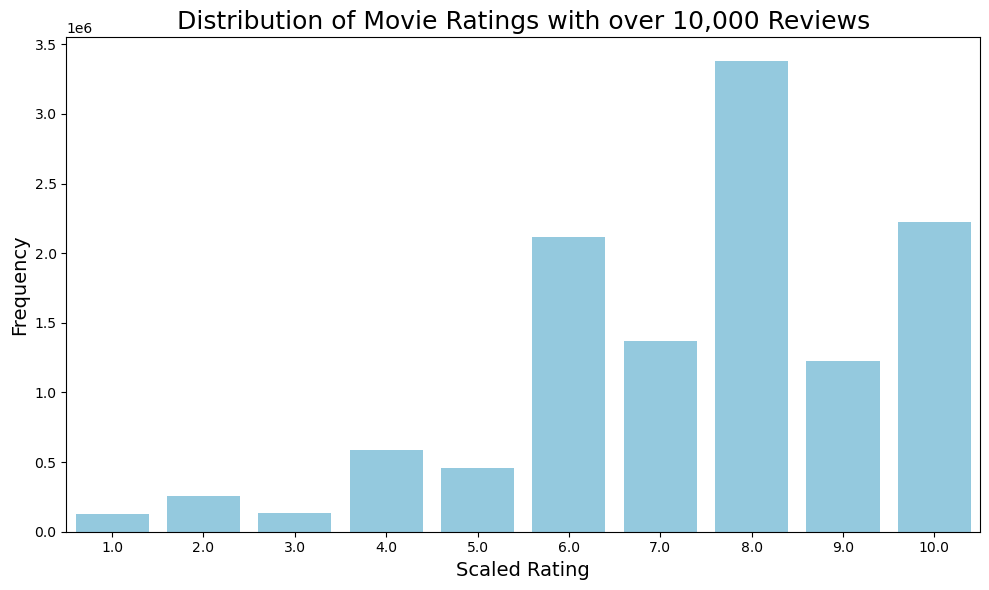

In [32]:
plt.figure(figsize=(10, 6))

sns.countplot(data=reviews_over_10_000, x='scaled_rating', color='skyblue')

plt.title('Distribution of Movie Ratings with over 10,000 Reviews', fontsize=18)
plt.xlabel('Scaled Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.savefig('../Visualizations/distribution_of_movie_ratings_min_10k.png')
plt.show()

### Top-rated and Worst-rated Movies with Over 10,000 Reviews

In [33]:
# Calculate the average rating for each movie
average_ratings_per_movie_10k = reviews_over_10_000.groupby(['imdb_id'])['scaled_rating'].mean().reset_index()

average_ratings_with_titles_10k = pd.merge(average_ratings_per_movie_10k, reviews_over_10_000[['imdb_id', 'title']].drop_duplicates(), on='imdb_id', how='left')

# Sort the movies based on their overall average ratings
top_10_movies_10k = average_ratings_with_titles_10k.sort_values(by = 'scaled_rating', ascending=False).head(10)

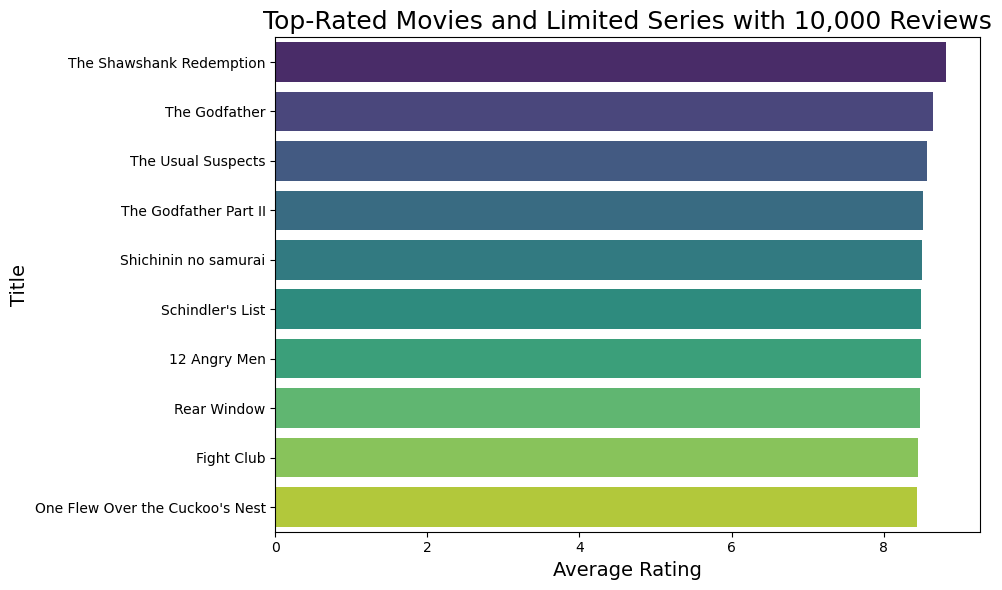

In [34]:
# Plotting the top-rated movies
plt.figure(figsize=(10, 6))

sns.barplot(x=top_10_movies_10k['scaled_rating'], y = top_10_movies_10k['title'], palette='viridis')

plt.title('Top-Rated Movies and Limited Series with 10,000 Reviews', fontsize=18)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Title', fontsize =14)

plt.tight_layout()
plt.savefig('../Visualizations/top_rated_min_10k.png')
plt.show()

In [35]:
# Sort the movies based on their overall average ratings
bottom_10_movies_10k = average_ratings_with_titles_10k.sort_values(by = 'scaled_rating', ascending=True).head(9)
bottom_10_movies_10k

,imdb_id,scaled_rating,title
356,tt0120891,4.639341,Wild Wild West
248,tt0113492,5.110720,Judge Dredd
164,tt0106598,5.162953,Coneheads
234,tt0112715,5.204432,Congo
223,tt0112281,5.284336,Ace Ventura: When Nature Calls
251,tt0113855,5.309248,Mortal Kombat
270,tt0115798,5.411773,The Cable Guy
396,tt0175142,5.435544,Scary Movie
126,tt0097523,5.437484,"Honey, I Shrunk the Kids"


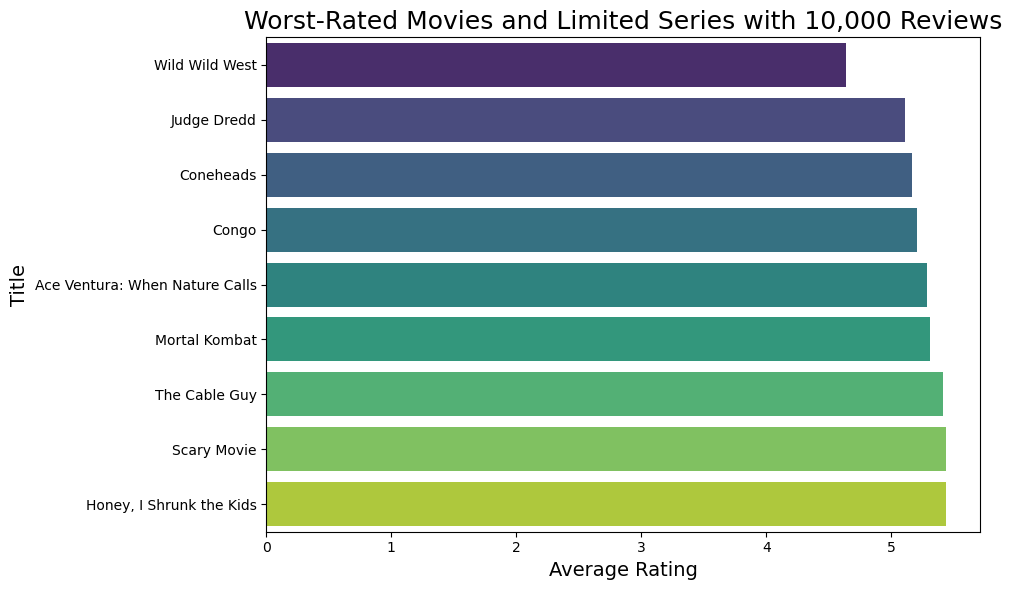

In [36]:
# Plotting the worst-rated movies
plt.figure(figsize=(10, 6))

sns.barplot(x=bottom_10_movies_10k['scaled_rating'], y = bottom_10_movies_10k['title'], palette='viridis')

plt.title('Worst-Rated Movies and Limited Series with 10,000 Reviews', fontsize=18)
plt.xlabel('Average Rating', fontsize =14)
plt.ylabel('Title', fontsize = 14)

plt.tight_layout()
plt.savefig('../Visualizations/worst_rated_min_10k.png')
plt.show()

**Interpretation:** While the ratings of the top-rated movies stayed around the same, in the low 8s, the worst rated movies are now hovering around 5 instead of 2. This shows that as the number of reviews for a movie increases, so does its rating floor. If you're going to make a bad movie, you're better off if a lot of people see it, otherwise you could be dealing with significantly lower reviews.